# <font color='navy' size=6>Achint Khanijo</font>

This midterm will be a little different.  The zip file includes 30-35 different stock tickers as well as two aggregate csv files with all stocks.  Your ask is as follows:

Q1.Load in all stock tickers as variables with the ticker symbol as their variable name, including the all stock csv file. 

Q2.Perform Exploratory data analysis and data visualization for different time periods using given stock dataset.

Q3.You need to take one stock and perform descriptive analysis  (Min, Max, explore some moving averages over the time) and Compare two stock’s descriptive analysis.

Q4.Take five stocks of your choice and create the same type of report stated in question 3.

Notes:

You need to write a report for every question in a cell before solving the question. In this report, you need to write what approach you are considering to solve each question. You can include visualization, code or anything whatever you think best describe your approach. (25%)

Midterm contains three questions. For every question weighttag of marks is 25%.

# Q1
## Strategy for data loading
1. Read all csv files in the working directory
2. Import the the file names and store them in a list
3. For each filename, using exec command, create a variable and look for the file by same filename in the working directory and load it using pandas read_csv function

In [1]:
import os
import glob
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
path = os.getcwd()

In [3]:
allfiles = glob.glob('*.csv')

In [4]:
filenames=[]
for item in allfiles:
    filenames.append(item.split('.')[0])

In [5]:
stock_list=[]
for name in filenames:    
    if name.split("_")[0] != 'all':
        stock_list.append(name.split('_')[0])
        exec(name.split("_")[0] + " = pd.read_csv(name+'''.csv''')")
    else:
        stock_list.append(name.split('.')[0].replace('-','_'))
        exec(name.split(".")[0].replace('-','_') + " = pd.read_csv(name+'''.csv''')")

# Q2
## Exploratory Analysis 
* Load data from original df to a new df
* Create a function which will take stock name as an argument

    1. Filter data according to the passed argument of stock name
    2. Create a group by object on year(extracted from date column)
    3. For each year,get Open price for the earliest date in the dataset and Close price for the latest date in the dataset.
    4. Calculate the annual return using the open and close prices of each year
    5. Return the mean of all year's averages

  Function ends


* Create a loop to read all the unique stocks in the file and for each stock call the previous function
* Sort the resultant data descending from highest return
* Extract the top five companies with highest returns
* Plot the bar chart comparing the returns
* Plot a line plot comparing the share prices over the years t]of the chosen five companies
* Plot average dollar volume traded in a day


    

In [6]:
df = all_stocks_2006_01_01_to_2018_01_01
df['Date'] = pd.to_datetime(df['Date'])

In [7]:
def analyse(stock):
    dfstk = df.query('Name==@stock')
    gb = dfstk.groupby(dfstk['Date'].dt.year)
    closep = dfstk[dfstk['Date'].isin(gb['Date'].max())][['Close']].reset_index().drop('index',axis=1)
    openp = dfstk[dfstk['Date'].isin(gb['Date'].min())][['Open']].reset_index().drop('index',axis=1)
    prices = closep.reset_index().merge(openp.reset_index(),on='index').drop('index',axis=1)
    annual_return = (((prices['Close']-prices['Open'])/(prices['Open']))*100).mean()
    return annual_return

In [8]:
avg_ret=[]
for stock in list(df['Name'].unique()):
    avg_ret.append([stock,round((analyse(stock)),2)])

Average annual returns of all the companies, from 2006 - 2017), in descending order

In [9]:
retdf = pd.DataFrame(avg_ret,columns=['Stock','Avg. Annual Return%'])
retdf.sort_values(by='Avg. Annual Return%',ascending = False).reset_index().drop('index',axis=1)

,Stock,Avg. Annual Return%
0,AMZN,43.91
1,AAPL,36.18
2,GOOGL,20.54
3,BA,17.64
4,NKE,17.31
5,HD,15.58
6,MCD,15.38
7,DIS,15.22
8,UNH,14.64
9,GS,14.33


In [10]:
top5 = retdf.nlargest(5,columns='Avg. Annual Return%').set_index([[1,2,3,4,5]])

In [11]:
# Top 5 companies with highest annual returns from 2006 - 2017
top5

,Stock,Avg. Annual Return%
1,AMZN,43.91
2,AAPL,36.18
3,GOOGL,20.54
4,BA,17.64
5,NKE,17.31


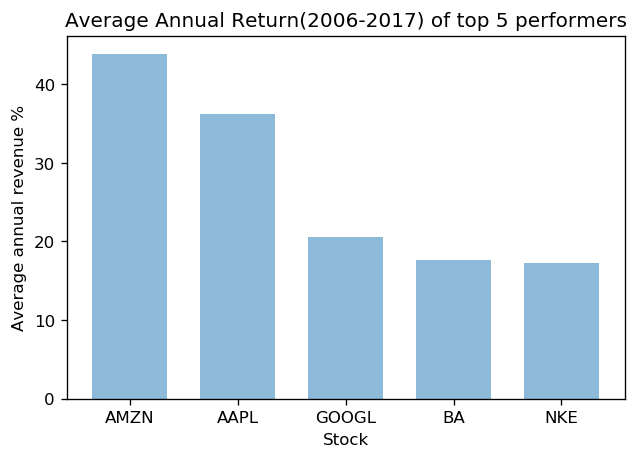

In [13]:
fig, ax = plt.subplots()
ax.bar(top5['Stock'],top5['Avg. Annual Return%'],0.7,alpha=0.5)
ax.set_title('Average Annual Return(2006-2017) of top 5 performers')
ax.set_xlabel('Stock')
ax.set_ylabel('Average annual revenue %')
fig.set_dpi(120)

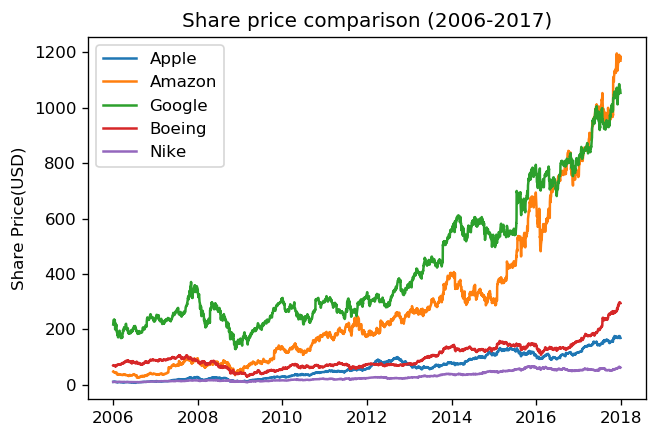

In [14]:
fig, ax = plt.subplots()
plt.plot(df[df['Name']=='AAPL']['Date'],df[df['Name']=='AAPL']['Close'],label="Apple")
plt.plot(df[df['Name']=='AMZN']['Date'],df[df['Name']=='AMZN']['Close'],label="Amazon")
plt.plot(df[df['Name']=='GOOGL']['Date'],df[df['Name']=='GOOGL']['Close'],label="Google")
plt.plot(df[df['Name']=='BA']['Date'],df[df['Name']=='BA']['Close'],label="Boeing")
plt.plot(df[df['Name']=='NKE']['Date'],df[df['Name']=='NKE']['Close'],label="Nike")
plt.legend()
ax.set_title('Share price comparison (2006-2017)')
ax.set_ylabel('Share Price(USD)')
fig.set_dpi(120)

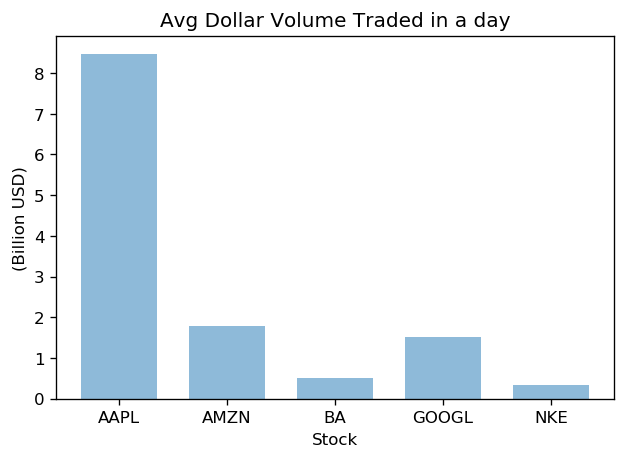

In [36]:
dft5 = df[df['Name'].isin(['AAPL','AMZN','GOOGL','BA','NKE'])]
vol = dft5.groupby(['Name']).mean().reset_index()[['Name','Volume','Close']].copy()
vol['Volume'] = vol['Volume']*vol['Close']/1000000000
fig,ax = plt.subplots()
ax.bar(vol['Name'],vol['Volume'],0.7,alpha=0.5)
ax.set_xlabel('Stock')
ax.set_ylabel('(Billion USD)')
ax.set_title('Avg Dollar Volume Traded in a day')
fig.set_dpi(120)


# Q3
* Extract the descriptive statistics from the Apple stock data(which has highest avg traded dollar volume) like:
    1. Current day Open Price
    2. Current day Close Price
    3. Current day High
    4. Current day Low
    5. 52 week high
    6. 52 week low
    
* Calculate 50 day and 200 day moving average

<i>When the 50 day moving aveage crosses the 200 day moving average, it is a sign for a stock to be bullish</i>

* Hence, plot the moving averages for 200-day SMA and 50-day SMA
* Calculate similar statistics for Amazon and Google which have similar share price range
* Plot the moving averages for Amazon and Google

In [37]:
AAPL['Date'] = pd.to_datetime(AAPL['Date'])

In [38]:
AAPLwk52 = AAPL.nlargest(365,columns='Date')
print('Stock: Apple')
print('Date:{0}\n'.format(AAPLwk52['Date'].dt.date.max()))
print('Open:\t\t${0:.2f}\nClose:\t\t${1:.2f}\nHigh:\t\t${2:.2f}\nLow:\t\t${3:.2f}'.format(AAPLwk52[AAPLwk52['Date']==AAPLwk52['Date'].max()]['OpenAAPL'].iloc[0],AAPLwk52[AAPLwk52['Date']==AAPLwk52['Date'].max()]['CloseAAPL'].iloc[0],AAPLwk52[AAPLwk52['Date']==AAPLwk52['Date'].max()]['HighAAPL'].iloc[0],AAPLwk52[AAPLwk52['Date']==AAPLwk52['Date'].max()]['LowAAPL'].iloc[0]))
print('52 wk High:\t${0:.2f}'.format(AAPLwk52['HighAAPL'].max()))
print('52 wk Low:\t${0:.2f}'.format(AAPLwk52['LowAAPL'].min()))

Stock: Apple
Date:2018-10-10

Open:		$225.46
Close:		$216.36
High:		$226.35
Low:		$216.05
52 wk High:	$233.47
52 wk Low:	$142.20


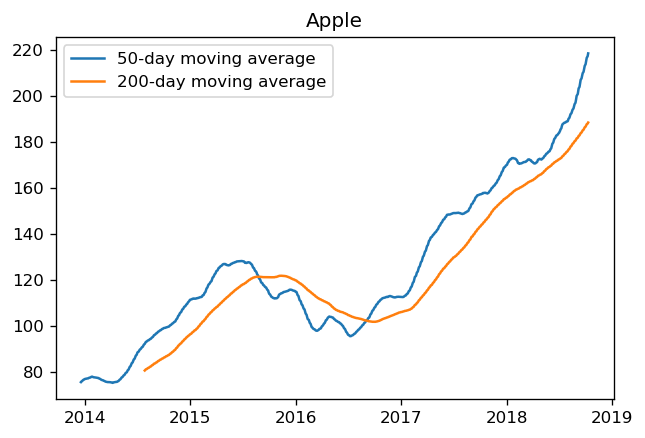

In [43]:
AAPL['50SMA'] = AAPL['CloseAAPL'].rolling(window=50).mean()
AAPL['200SMA'] = AAPL['CloseAAPL'].rolling(window=200).mean()
fig=plt.figure()
plt.plot(AAPL['Date'],AAPL['50SMA'],label='50-day moving average')
plt.plot(AAPL['Date'],AAPL['200SMA'],label='200-day moving average')
plt.title('Apple')
fig.set_dpi(120)
plt.legend()

In [41]:
GOOGL['Date'] = pd.to_datetime(GOOGL['Date'])
GOOGLwk52 = GOOGL.nlargest(365,columns='Date')
AMZN['Date'] = pd.to_datetime(AMZN['Date'])
AMZNwk52 = AMZN.nlargest(365,columns='Date')
print('Stock:\t\tGoogle\t\t\tAmazon')
print('Date:{0}\n'.format(GOOGLwk52['Date'].dt.date.max()))
print('Open:\t\t${0:.2f}\t\t${4:.2f}\nClose:\t\t${1:.2f}\t\t${5:.2f}\nHigh:\t\t${2:.2f}\t\t${6:.2f}\nLow:\t\t${3:.2f}\t\t${7:.2f}'.format(GOOGLwk52[GOOGLwk52['Date']==GOOGLwk52['Date'].max()]['OpenGOOGL'].iloc[0],GOOGLwk52[GOOGLwk52['Date']==GOOGLwk52['Date'].max()]['CloseGOOGL'].iloc[0],GOOGLwk52[GOOGLwk52['Date']==GOOGLwk52['Date'].max()]['HighGOOGL'].iloc[0],GOOGLwk52[GOOGLwk52['Date']==GOOGLwk52['Date'].max()]['LowGOOGL'].iloc[0],AMZNwk52[AMZNwk52['Date']==AMZNwk52['Date'].max()]['OpenAMZN'].iloc[0],AMZNwk52[AMZNwk52['Date']==AMZNwk52['Date'].max()]['CloseAMZN'].iloc[0],AMZNwk52[AMZNwk52['Date']==AMZNwk52['Date'].max()]['HighAMZN'].iloc[0],AMZNwk52[AMZNwk52['Date']==AMZNwk52['Date'].max()]['LowAMZN'].iloc[0]))
print('52 wk High:\t${0:.2f}\t\t${1:.2f}'.format(GOOGLwk52['HighGOOGL'].max(),AMZNwk52['HighAMZN'].max()))
print('52 wk Low:\t${0:.2f}\t\t\t${1:.2f}'.format(GOOGLwk52['LowGOOGL'].min(),AMZNwk52['LowAMZN'].min()))

Stock:		Google			Amazon
Date:2018-10-10

Open:		$1136.40		$1857.89
Close:		$1092.16		$1755.25
High:		$1137.02		$1858.56
Low:		$1091.51		$1754.65
52 wk High:	$1291.44		$2050.50
52 wk Low:	$915.31			$927.00


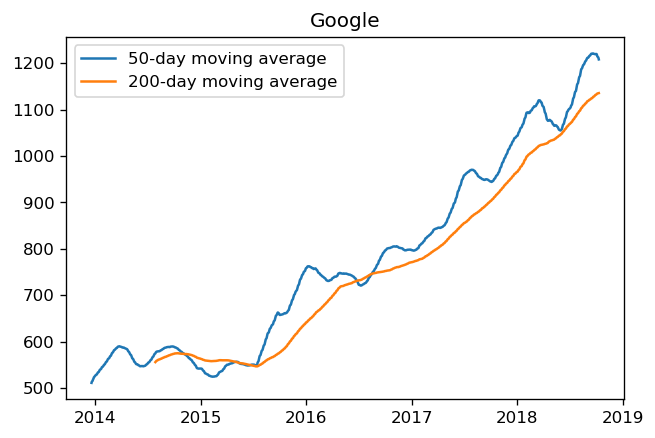

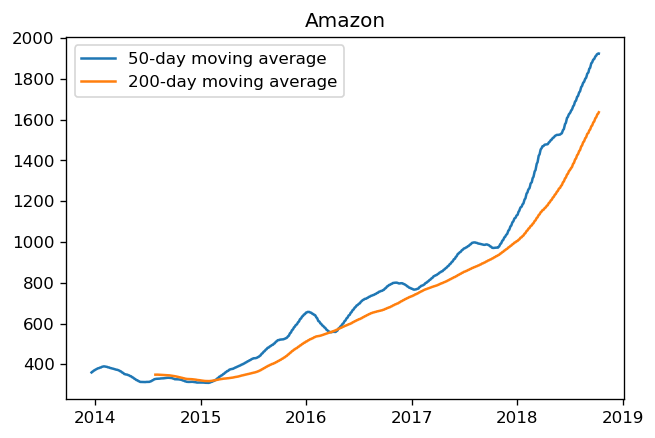

In [164]:
GOOGL['50SMA'] = GOOGL['CloseGOOGL'].rolling(window=50).mean()
GOOGL['200SMA'] = GOOGL['CloseGOOGL'].rolling(window=200).mean()
fig=plt.figure()
plt.plot(GOOGL['Date'],GOOGL['50SMA'],label='50-day moving average')
plt.plot(GOOGL['Date'],GOOGL['200SMA'],label='200-day moving average')
plt.title('Google')
fig.set_dpi(120)
plt.legend()
AMZN['50SMA'] = AMZN['CloseAMZN'].rolling(window=50).mean()
AMZN['200SMA'] = AMZN['CloseAMZN'].rolling(window=200).mean()
fig=plt.figure()
plt.plot(AMZN['Date'],AMZN['50SMA'],label='50-day moving average')
plt.plot(AMZN['Date'],AMZN['200SMA'],label='200-day moving average')
plt.title('Amazon')
fig.set_dpi(120)
plt.legend()
    

# Q4
* Use logic from Q3 to generate statistics for a stock and put it in a function
* Put the function in a loop so that all five stocks can be queried in one go
* Plot the moving averages of all five stocks in the same loop

In [179]:
def des_stock(x):
    x['Date']=pd.to_datetime(x['Date'])
    desc = []
    openp = x.nlargest(1,columns='Date').iloc[0,1]
    closep= x.nlargest(1,columns='Date').iloc[0,4]
    high = x.nlargest(1,columns='Date').iloc[0,2]
    low = x.nlargest(1,columns='Date').iloc[0,3]
    high_52wk = x.nlargest(365,columns='Date').iloc[:,2].max()
    low_52wk = x.nlargest(365,columns='Date').iloc[:,3].min()
    desc.append(x.iloc[0,7])
    desc.append(high_52wk)
    desc.append(low_52wk)
    desc.append(openp)
    desc.append(closep)
    desc.append(high)
    desc.append(low)
    x['50SMA'] = x.iloc[:,4].rolling(window=50).mean()
    x['200SMA'] = x.iloc[:,4].rolling(window=200).mean()
    fig=plt.figure()
    plt.plot(x['Date'],x['50SMA'],label='50-day moving average')
    plt.plot(x['Date'],x['200SMA'],label='200-day moving average')
    plt.title(x.iloc[0,7]+' Moving Average')
    fig.set_dpi(120)
    plt.legend()
    return desc

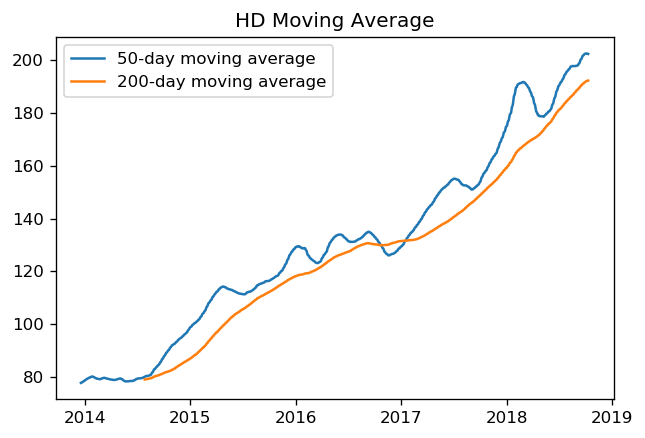

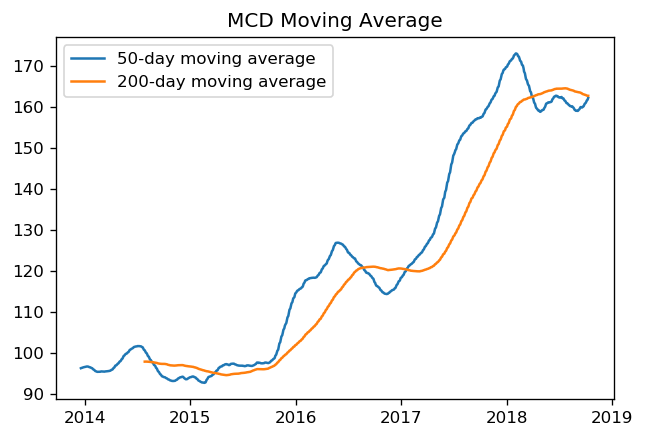

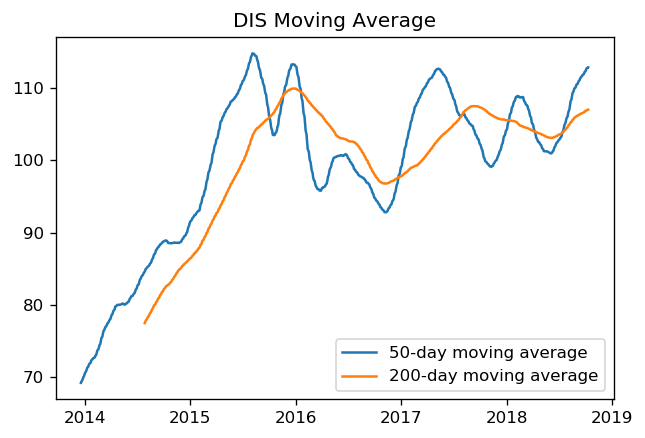

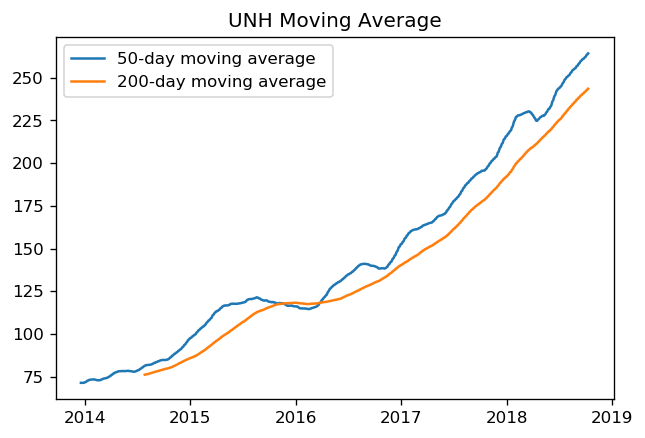

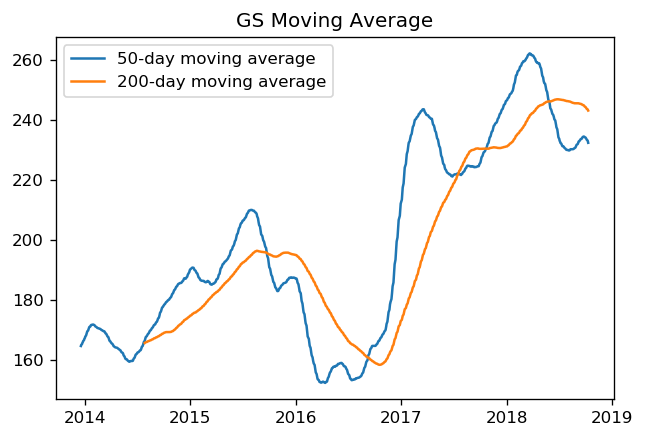

In [180]:
desc_stocks=[]
for stock in [HD,MCD,DIS,UNH,GS]:
    desc_stocks.append(des_stock(stock))
    
desc_df=pd.DataFrame(desc_stocks,columns=['Stock','52 Week High','52 Week Low','Open','Close','High','Low'])

In [181]:
pd.options.display.float_format = '${:,.2f}'.format
desc_df

,Stock,52 Week High,52 Week Low,Open,Close,High,Low
0,HD,$215.43,$144.25,$199.11,$193.70,$199.24,$193.35
1,MCD,$178.70,$140.72,$171.99,$168.37,$172.00,$168.22
2,DIS,$118.10,$96.20,$116.84,$112.86,$117.23,$112.73
3,UNH,$272.07,$166.65,$270.60,$263.08,$271.42,$262.52
4,GS,$275.31,$209.62,$223.24,$214.89,$223.64,$214.56
